# Solving the Vehicle Routing Problem using Genetic Algorithm

The Vehicle Routing Problem (VRP) is a well-known optimization problem in logistics and transportation. The goal is to determine the optimal set of routes for a fleet of vehicles to deliver goods to a set of locations from a central depot, minimizing the total distance traveled and ensuring a balanced workload among the vehicles. This problem is crucial for reducing operational costs and improving service efficiency.

## Applying GA to VRP

```Encoding of Solutions```: In this implementation, each solution (chromosome) is represented as a list of integers, where each integer corresponds to a specific location. The list defines the sequence in which locations are visited.

```Objective Function```: The fitness function for the VRP aims to minimize the total distance traveled by all vehicles and balance the workload among the vehicles. The total distance is the sum of Euclidean distances between consecutive locations in each vehicle's route. The balance penalty is calculated as the standard deviation of the distances traveled by each vehicle, promoting balanced routes.

D=∑ 
r∈R
​
 ∑ 
(i,j)∈r
​
 d 
ij
​



# Normal Algorithm Approach vs. Genetic Algorithm Approach

### Normal Algorithm Approach
Traditional algorithms like exact methods (e.g., branch and bound, dynamic programming) and heuristics (e.g., nearest neighbor, Clarke-Wright savings) have distinct time complexities:

```Exact Algorithms```: These methods have exponential time complexity, 
𝑂
(
𝑛
!
)
O(n!), where 
𝑛
n is the number of locations. They guarantee optimal solutions but are impractical for large instances due to combinatorial explosion.

```Heuristic Algorithms```: Heuristics typically have polynomial time complexity, ranging from 
𝑂
(
𝑛
2
)
O(n 
2
 ) to 
𝑂
(
𝑛
3
)
O(n 
3
 ). They provide faster solutions but often at the cost of solution quality and may get stuck in local optima.

### Genetic Algorithm Approach
Genetic Algorithms (GAs) have different characteristics in terms of time complexity:

```Initialization```: Generating an initial population of size 
𝑃
P takes 
𝑂
(
𝑃
⋅
𝑛
)
O(P⋅n), where 
𝑃
P is the population size.

```Evaluation```: Calculating the fitness for each individual involves evaluating the total distance and balance, which takes 
𝑂
(
𝑃
⋅
𝑛
)
O(P⋅n).

Selection, Crossover, and Mutation: Each generation involves selection, crossover, and mutation operations, each taking 
𝑂
(
𝑃
)
O(P), 
𝑂
(
𝑃
⋅
𝑛
)
O(P⋅n), and 
𝑂
(
𝑃
⋅
𝑛
)
O(P⋅n), respectively.

```Generations```: GAs typically run for a fixed number of generations 
𝐺
G.

Overall, the time complexity of GAs can be approximated as 
𝑂
(
𝐺
⋅
𝑃
⋅
𝑛
)

O(G⋅P⋅n). While this is polynomial, it is still more manageable than the exponential complexity of exact algorithms and can scale better with problem size.

In [ ]:
!pip install matplotlib deap

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Define the number of locations and vehicles
 Define how many locations (excluding the depot) the vehicles need to visit

 Generate random (x, y) coordinates for each location

 Define the central depot location as a fixed point

Define how many vehicles are available to visit the locations

In [4]:
num_locations = 20  
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  
depot = (50, 50)  
num_vehicles = 3

#  Genetic Algorithm Setup

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  
creator.create("Individual", list, fitness=creator.FitnessMin) 

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations) 
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  


In [6]:
def evalVRP(individual):
    total_distance = 0
    distances = []  
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  
    return total_distance, balance_penalty


In [7]:
toolbox.register("evaluate", evalVRP)  
toolbox.register("mate", tools.cxPartialyMatched) 
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3) 


# Plotting Function

In [8]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min    
0  	300   	671.807	4.32226
1  	213   	644.244	2.15886
2  	243   	630.155	6.64716
3  	232   	619.216	8.36271
4  	233   	618.006	3.90568
5  	218   	599.389	0.960257
6  	213   	594.257	0.960257
7  	233   	594.742	0.960257
8  	219   	579.572	2.81093 
9  	209   	572.642	8.63283 
10 	224   	572.573	6.5291  
11 	230   	563.62 	4.45593 
12 	230   	566.102	4.08238 
13 	217   	553.613	3.49097 
14 	231   	556.086	4.08238 
15 	250   	547.428	2.78715 
16 	238   	536.829	2.52745 
17 	236   	524.719	4.6375  
18 	225   	511.545	2.81538 
19 	225   	510.038	4.19623 
20 	209   	487.158	2.79767 
21 	232   	487.555	7.52471 
22 	237   	469.145	4.88784 
23 	217   	465.042	12.3405 
24 	227   	462.208	4.05643 
25 	246   	461.903	15.3212 
26 	233   	455.08 	4.23453 
27 	219   	454.233	4.23453 
28 	229   	445.134	1.97518 
29 	223   	443.25 	12.3    
30 	238   	432.135	14.8291 
31 	225   	419.459	12.0497 
32 	221   	417.4  	9.17686 
33 	243   	403.723	7.89768 
34 	232   	397.183	9.01698

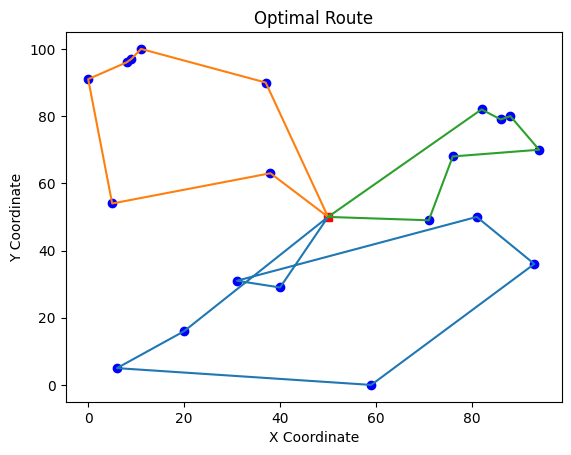

In [9]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)  
    hof = tools.HallOfFame(1)  

   
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
